# 3. მონაცემების კველვა და ვიზუალიზაცია

პირველი თავის ბოლოს ჩვენ ორი შედარებით მარტივი მოდელი ავაგეთ და ვნახეთ თუ რამდენად დახვეწილია დღეს მანქანური დასწავლის ბიბლიოთეკები. თუმცა აღნიშნული მაგალითები იყო საილუსტრაციო ხასიათის. ჩვენ გამოვტოვეთ მონაცემებზე დაფუძნებული ამოცანების ერთ-ერთი ყველაზე მნიშნველოვანი ნაწილი, მონაცემების კვლევა. ეს თავი სწორადაც რომ აღწერითი და დიაგნოზსტიკური ანალიზების ნაზავზე იქნება ორიენტირებული, რასაც მონაცემთა მეცნიერებაში მონაცემების კვლევით ანალიზს (Exploratory Data Analysis, შემოკლებულად-EDA) უწოდებენ.

აღნიშნული პროცესის განუყოფელი ნაწილია, მონაცემების ვიზუალიზაცია, შესაბამისად ამ თავში ასევე დავფარავთ ვიზუალიზაციის ყველაზე გავრცელებულ და ხშირად გამოყენებად ნაწილებს. რა თქმა უნდა პითონში არებობს მრავალი ძალიან დახვეწილი და მრავალფუნქციური ვიზუალიზაციის ბიბლიოთეკა, რომელთა მეშვებითაც თითქმის ყველაფერს შეძლებთ რასაც მოისურვებთ. თუმცა მონაცემთა ვიზუალიზაცია ცალკდე დიდი დარგია რაც ცხდება წიგნის მიზნებს. სწორად ამიტომ მხოლოდ მარტივ ხერხებს მივმართავთ, რაც მონაცემების სწრაფად აღქმასა და გაანლიზებაში დაგვეხმარება. 

მონაცვლეობით გამოვიყენებთ, როგორც pandas-ის ჩაშენებულ ფუნქციებს ისე ერთ-ერთ ყველაზე გავრცელებულ, სწრაფ და მოქნილ Seaborn-ის ბიბლიოთეკას. ასევე აღსანიშნავია პითონის ვიზუალიზაციის მთვარი ბიბლიოთება-matplotlib, რომელზეც არის დაშენებული seaborn. როგორც წესი ის პითონის ყველა ვერსიას მოყვება და არ საჭიროებს დაყენებას, თუმცა იგივეს ვერ ვიტყვით seaborn-ზე ამიტომ შესაძლოა მისი დაინსტალირებაც დაგვჭირდეს.

იმისათვის რომ მონაცემთა კვლევის ყველა ნაბიჯი დეტალურად დავფაროთ, ამ თავში ჩვენ მხოლოდ ერთ ცხრილს გამოვიყენებთ -  ნიუ იორკის ტაქსით მგზავრობის ხანგრძილოვებების შსახებ.

### 3.1 სამუშაო გარემოს მოწყობა და მონაცემების შემოტანა

მიღებულია, რომ ნებისმიერი მანქანური დასწავლის სამუშაო იწყება ყველა საჭირო ბიბლიოთეკისა და მონაცემების სამუშაო გარემოში შემოტანით. ჩვენც შესაბამისად მოვიქცეთ და გავმართოთ სამუშაო გარემო შემდეგი ბრძანებების გამოყენებით:

In [210]:
# !pip install seaborn #აღნიშნული ბრძანება საჭიროა მხოლოდ იმ შემთხვევაში, თუ თქვენ უკვე არ გაქვთ დაყენებული
                     # seaborn-ის ბიბლიოთეკა.
#ზოგადად ბრძანება რომელიც იწყება !pip install განკუთვნილია კონკრეტული ბიბლიოთეკის დასაყენებლად, შესაბამისი 
#სახელის მითითებით.

In [1]:
import pandas as pd #მონაცემების დამუშავების ბიბლიოთეკა
import numpy as np #მონაცემების დამუშავების ბიბლიოთეკა
import seaborn as sns #მონაცემების ვიზუალიზაციის ბიბლიოთეკა
import matplotlib.pyplot as plt #მონაცემების ვიზუალიზაციის ბიბლიოთეკა

# წინასწარ განსაზღვრულად matplotlib ბიბლიოთეკა, არ ბეჭდავს ვიზუალიზაციას დამატებითი, .show(), ბრძანების გარეშე,
# თუმცა ქვემოთ მოცემული კოდი დაგვეხმარება არსებულ ნოუთბუქში, ვიზუალიზაციის ნებისმიერი ფუნქციის გამოყენების
# შემდგომ, პირდაპირ დავბეჭდოთ გრაფიკები
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [2]:
df = pd.read_csv('/mydrive/DS101 - Call II/S5-6 EDA and Visualization/NYCTaxi.csv') #მთლიანი მონაცემების შემოტანა სამუშაო გარემოში

### 3.2 მონაცემების პირველადი კვლევა

სანამ უშუალოდ მონაცემების შესწავლაზე გადავალთ, როგორც პირველ თავში აღვნიშნეთ ნებისმიერი მონაცემებზე დაფუძნებული ამოცანა მისი შინაარსის გააზრებით იწყება. სწორად ამიტომ ჯერ კარგად აღვწეროთ საერთოდ რა ტიპის მონაცემებთან გვექნება საქმე და რა მიზანს ისახავს.

მოცემული გვაქვს 2016 წლის ნიუ იორკის "ყვითელი ტაქსებით" მგზავრობის მონაცემები შემდეგი ცვლადებით:
* id - ჩანაწერის უნიკალური ნომერი
* vendor_id - ტაქსის პროვაიდერის ნომერი
* pickup_datetime - მგზავრობის დაწყების დრო
* dropoff_datetime - მგზავრობის დასრულების დრო
* passenger_count - მგზავრების რაოდენობა
* pickup_longitude - მგზავრობის დაწყების გრძედი
* pickup_latitude - მგზავრობის დაწყების განედი
* dropoff_longitude - მგზავრობის დასრულების გრძედი
* dropoff_latitude - მგზავრობის დასრულების განედი
* store_and_fwd_flag - Y და N-ით აღნიშნულია მანქანამ პირდაპირ გადასცა მგზავრობის ინფორმაცია სერვერს, თუ ვერ დაუკავშირდა და ჯერ ლოკალურად შეინახა.
* trip_duration - მგზავრობის ხანგრძლივობა წამებში.

ამოცანის მიზანია მოცემული ცვლადების გამოყენებით (გარდა dropoff_datetime-სა) ავაგოთ ისეთი მოდელი, რომელიც იპროგნოზებს მგზავრობის ხანგძლივობას (trip_duration). ჩვენ ამ თავში მოდელს არ ავაგებთ და მხოლოდ მონაცემების კვლევით შემოვიფარგლებით. შინაარსობრივადაც რთული ამოცანა ნამდვილად არ არის, ამიტომ შეგვიძლია პირდაპირ საქმეზე გადავიდეთ.

*ამოცანის და მონაცემების დეტალური აღწერისთვის, გირჩევთ ეწვიოთ წყაროს:* https://www.kaggle.com/competitions/nyc-taxi-trip-duration/overview

In [3]:
df.shape #მონაცემების განზომილებების შემოწმება

(1458644, 11)

In [4]:
df.head() #მონაცემების პირველი 5 ჩანაწერის დაბეჭვდა

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.info() #მონაცემების ტიპების შემოწმება

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


.info() ბრძანების დახმარებით ვხედავთ, რომ თარიღებთან დაკავშირებული ორივე ცვლადი ობიექტის ტიპად არის ჩაწერილი. ხოლო მათ მოქნილად და სწრაფად დასამუშავებლად აუცილებელია ისინი გადავიყვანოთ datetime  ფორმატში.

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

მანქანური დასწავლის არც ერთი მოდელი არ მუშაობს ცარიელ მონაცემებთან. შესაბამისად საჭიროა მათი შემოწმება და გარკვეული მონაცემებით შევსება ან სულაც ასეთი ცვლადების წაშლა. 

In [7]:
missing_percentages = df.isna().sum().sort_values(ascending = True) / len(df)
missing_percentages

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

მოდით დეტალურად ავხსნათ თუ როგორ მუშაობს ზემოთ მოყვანილი ბრძანება. df.isna() ყველა ჩანაწერისთვის აბრუნებს  True/False მნიშნვნელობებს, ხოლო როგორც წინა თავში გავიარეთ პითონი ბულიან ცვლადებს 1/0-ებად აღიქვამს. შესაბამისად როდესაც df.isna().sum() ვბეჭადვს ის უბრალოდ ყველა True-ს აჯამებს, რაც თითეულ ცვლადში ცარიელი მნიშნველობების რაოდენობას გამოიტანს. შემდგომი ბრძანება .sort_values(ascending = True) მონაცემებს უბრალოდ ზრდადობით ალაგებს. ხოლო მთლიანი ცხრილის სიგრძეზე გაყოფა (/len(df)), ცარიელი მონაცემების პროცენტულ მნიშნველობებს გვიბრუნებს.

გაგვიმართლა, რომ ყველა ცვლადი შევსებულია და არ გვიწევს ამ პრობლემაზე ზრუვნა. თუმცა რეალურ გარემოშო უფრო ხშირად შეხვდებით ისეთ მონაცემებს, სადაც რამდენიმე ცვლად ჩანაწერები აკლია. თუ უნდა მოვეპყროთ ცარიელ მონაცემებს, ამაზე დეტალურად ვისაუბრებთ მომდევნო თავებში.

ახლა კი შეგვიძლია pandas ბიბლიოთეკის ერთ-ერთი ყველაზე მნიშნველოვანი და გენილური ფუნქცია .describe() გამოვიყენოთ. აღნიშნული ფუნქცია ყველა გადაცემულ რიცხვით ცვლადზე აბრუნებს აღწერითი სტატისტიკის შემდეგ მახასიათებლებს:
* count - ჩანაწერების რაოდენობა
* mean - ცვლადის არითმეტიკული საშუალო
* std - ცვლადის სტანდარტული გადახრა
* min - ცვლადის მინიმალური მნიშვნელობა
* 25% - ცვლადის 25-ე პერსენტილი
* 50% - ცვლადის 50-ე პერსენტილი, ანუ მედიანა
* 75% - ცვლადის 75-ე პერსენტილი
* max - ცვლადის მაქსიმალური მნიშვნელობა

მიუხედავად იმისა, რომ ჩვენ მონაცემებში მრავალი რიცხვითი მნიშვნელობების მქონე ცვლადია, შინაარსობრივად გრძედის და განედის აღწერითი სტატისტიკური მახასიათებლები აზრს მოკლებულია. შესაძლოა რაიმე მინიშნება მოგვცეს განცალკევებულ მონაცემებზე, მაგალითად თუ მინიმალური ან მაქსიმალური გრძედის მნიშვნელობა მკვეთრად განსხვავდება მისი საშუალოსა და სხვა მახასიათებლებისგან, თუმცა უმჯობესია ამით არ ვიხელმძღვანელოთ. ტაქსის პროვაიდერის ნომერიც რიცხვითი მნიშნველობაა, თუმცა ეს ცალსახად კატეგორიული ცვლადია და აქაც ბევრ დასვკებს ვერ გამოვიტანთ ზემოთ მოყვანილი მახასიათებლებით. შესაბამისად გამოდის, რომ მხოლოდ მგზავრების რაოდენობასა და მგზავრობის ხანგრძლიოვბაზე აქვს აზრი pandas-ის .describe() ფუნქციის გამოყენებას. თუმცა ჩვენ მაინც მთლიანი ცხრილი გადავცეთ და ვნახოთ რა შედეგებს მივიღებთ:

In [8]:
round(df.describe(), 3)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


პირველი რაც თვალში გვხდება მგზავრობის ხანგრძილოვბის მაქსიმალური მნიშნველობაა - 3,526,282 წამი, მიახლოებით 980 საათი. რა თქმა უნდა ეს მონაცემი რეალურს არ გავს. ძნელად წარმოსადგენია ვინმემ ტაქსით 40 დღე იმგზავროს. მეტად სავარაუდოდ საქმე გაფუჭებულ მონაცემთან გვაქვს. ასევე საყურადღეობა იმავე ცვლადის მინიმალური მნიშვნელობა - 1 წამი, რაც შესაძლოა გაუქმებულ შეკვეთას ნიშნავდეს. თუმცა ამ შემთხვევაში მგზავრობის დაწყებისა და დასრულების გრძედებიცა და განედებიც ერთამეთის ტოლი უნდა იყოს. მოკლედ რომ ვთქვათ მონაცემებზე ზოგადი წარმოდგენა უკვე შევიქმენით, ყველა ცვლადი გადავიყვანეთ მათთვის შესაბამის ფორმატში და ახლა უკვეა დროა თითოეული ცვლადის დეტალურ კვლევას შევუდგეთ. რადან პირველი ეჭვები მგზავრობის ხანგრძილოვბაზე გაგვიჩნა მოდით ამავე ცვლადით დავიწყოთ.

რადგან მონაცემებსა და ამოცანა ზოგადი წარმოდგენა უკვე შევიქმენით, შეგვიძლია პირველი, საბაზისო, მოდელი ავაგოთ. შემდგომი თავის ბოლოს კი, როდესაც სრულად დავფარავთ მონაცემების კვლევასა და მათ დამუშავებას კიდევ ერთხელ ავაგდებთ და ვნახავთ თუ რა შედეგს იძლევა აღნიშნული ძალისხმევა.

პირველი თავის მსგავსად ჩვენ ამჯერადაც autogluon-ს გამოვიყენებთ, ხოლო სიმარტივისთვის დროის ცვლადებს არ გამოვიყენებთ, რადგან ისინი დამუშავებას საჭიროებენ.

In [9]:
df.columns.to_list()

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

### 3.3 ცვლადების დეტალური კვლევა

#### 3.3.1 მგზავრობის ხანგრძლიოვბა

მოდით პირველ რიგში აღნიშნული ცვლადის განაწილება დავბეჭდოთ და ვნახოთ გვაქვს თუ არა რაიმე ტიპის უცნაურობები.

#####  ჰისტოგრამა
ამისათვის ჰისტოგრამა გამოიყენება. მის ასაგებად, პირველ რიგში საჭიროა ცვლადის ტოლ ინტერვალებად დაყოფა და შემდეგ დათვლა თუ რამდენი მონაცემი ჩავარდა თითოეულ ინტერვალში (ბინში).

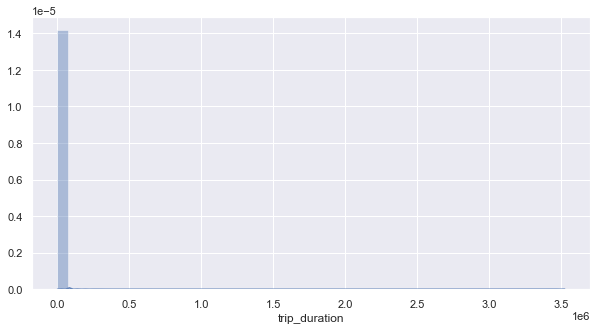

In [39]:
plt.figure(figsize = (10, 5))
sns.distplot(df['trip_duration'])

ზემოთ მოცემული განაწილებიდან, რთულია რაიმეს დანახვა. სავარაუდოდ ასეთი ვიზუალი სწორადაც განცალკევებული მონაცემების ბრალია. ან ჩანაწერების უმეტესობა მართლაც 0-თან ახლოსაა, თუმცა ამაზე პასუხი უკვე describe ფუნქციამ გაგვცა. ამიტომ შეგვიძლია მგაზვრობის ხანგღძლივობა ხელით მოვჭრათ, მაგალითად 2 საათზე და ასე ვცადოთ განაწილების შემოწმება.

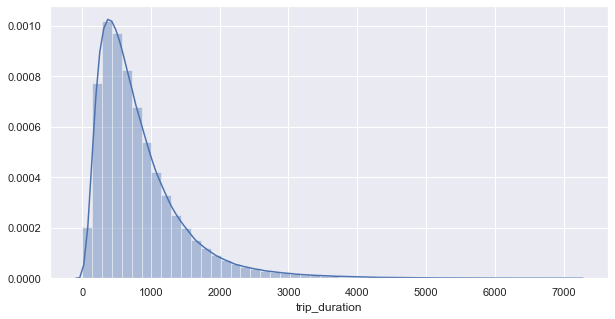

In [107]:
plt.figure(figsize = (10, 5))
sns.distplot(df[df['trip_duration'] < 7200]['trip_duration'])

საინტერესო იქნება შევამოწმოთ, ხომ არ განსხვავდება მგზავრობის ხანგრძლივობის განაწილება ტაქსის პროვაიდერების მიხედვით. ამისათვის ჯერ უნდა ვნახოთ რამდენი განსხვავებული კომპანიის ჩანაწერებია ჩვენს ცხრილში.

In [108]:
df['vendor_id'].nunique() #უნიკალური მნიშვნელობების რაოდენობის დაბეჭვდა

2

In [109]:
df['vendor_id'].unique() #უნიკალური მნიშნვნელობიბის დაბეჭვდა

array([2, 1])

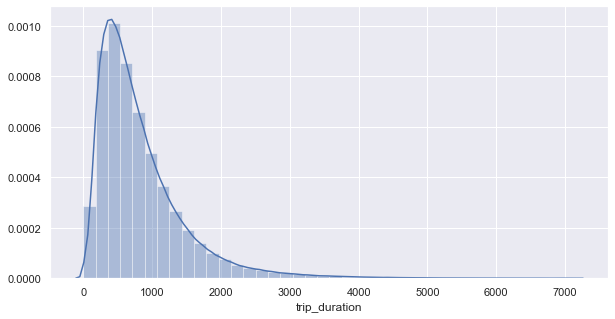

In [111]:
plt.figure(figsize = (10, 5))
sns.distplot(df[(df['vendor_id'] == 1) & (df['trip_duration'] < 7200)]['trip_duration'], bins = 40)

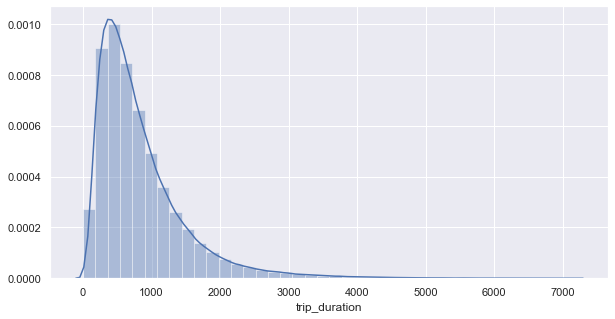

In [112]:
plt.figure(figsize = (10, 5))
sns.distplot(df[(df['vendor_id'] == 2) & (df['trip_duration'] < 7200)]['trip_duration'], bins = 40)

ზემოთ მოცემული ორი განაწილება სხვადასხვა პროვაიდერებისთვის, პირველადი დაკვირვებით ერთგვაროვანია. თუმცა არ უნდა დაგვავიწყდეს, რომ ჩვენ მონაცემები 2 საათზე მოვჭერით. შესაბამისად შეგვიძლია ვთქვათ რომ "ნორმალური" ჩანაწერებისთვის განაწილებები ერთგვაროვანია, თუმცა რა ხდება განცალკევებულ ჩანაწერებზე? რომელიმე ერთ კომპანიაში ხომ არ არის უფრო მეტი ან ნაკლები? describe-ის შედეგერბიდან გამომდინარე უხეშად შეგვიძლია ვივარაუდოდ, რომ 2 საათზე მეტი ხანგრძლივობის ჩანაწერი საკმაოდ ცოტა იქნება. შესაბამისად შეგვიძლია უფრო მარტივი გზით წავიდეთ და ვნახოთ სულაც რამდენი ჩანაწერია 2 საათზე მეტი ხანგრძლივობის და როგორ ნაწილდება ეს სხვადახვა კოპმანიებზე.

In [135]:
df[df['trip_duration'] >= 7200]['vendor_id'].value_counts()

2    2170
1      83
Name: vendor_id, dtype: int64

როგორც ვხედავთ სულ დაახლოებით 2500 ჩანაწერია 2 საათზე მეტი ხანგრძლივობის და აქედან 95%-ზე მეტი მეორე კომპანიაზე მოდის. აქ შესაძლოა ორ განსხვავებულ სცენართან გვქონდეს საქმე: 1. მეორე კომპანიიის მონაცემები უფრო მეტად არის დაიზიანებული ან სულაც სხვანაირად აღრიცხავენ ხანგრძლივობას; 2. რაღაც ისეთ მოშორებულ ლოკაციაზე დადის მეორე პროვაიდერი სადაც პირველი ან საერთოდ ან უფრო იშვიათან მიემგზავრება. თუმცა სანამ გეოგრაფიული ცვლადების გარჩევას დავიწყებთ, უმჯობესია ჯერ შედარებით მარტივი, მგზავრების რაოდენობის, ცვლადი გავაანალიზოთ.

#### 3.3.1 მგზავრობის რაოდენობა

##### Bar Chart
ბარ ჩარტი არის გრაფიკი რომელიც გამოიყენება კატეგორიული მონაცემებისთვის და გადმოსცემს მის კატეგორიების მნიშვნელობებს სიმაღლეში ან სიგრძეში. შესაბამისად ის ძირითადად მონაცემების შესადარებლად აიგება. ხშირად კლებადობით დალაგებულ ჰორიზონტალურ ბარ ჩარტებს ანიჭებენ უპირატესობას, რადგან თვალისთვის სიგრძის შედარება უფრო მარტივია ვიდრე სიმაღლის. თუმცა ამ შემთხვევაში ჩვენ უფრო ზოგადი სურათის დანახვა გვსურს კომპანიების ჭრილში ხომ არ განსხვავდებიან მგზავრების რაოდენობით. 

იქედან გამომდინარე, რომ ტაქსიში მგზავრების რაოდენობა სავარაუდოდ 1-დან 4-მდე უნდა მერყეობდეს, value_counts ფუქნცია რთულად აღსაქმელ შედეგს მოგცემს და უმჯობესია seaborn ბიბლიოთეკის countplot გამოვიყენოთ, რომელიც თითეულ კატეგორიაში ჩანაწერების რაოდენობას სწორადაც რომ Bar Chart-ში გამოსახავს.

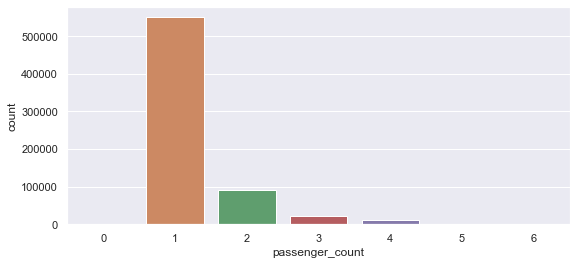

In [137]:
plt.figure(figsize=(9,4))
sns.countplot(df[df['vendor_id'] == 1]['passenger_count'])

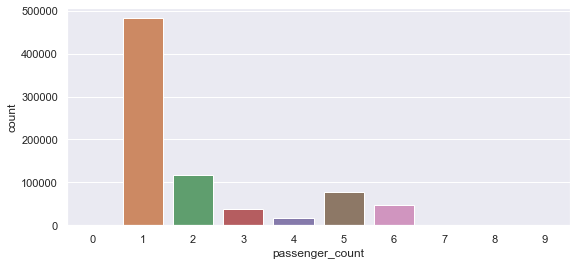

In [138]:
plt.figure(figsize=(9,4))
sns.countplot(df[df['vendor_id'] == 2]['passenger_count'])

როგორც ვხედავთ მეორე კომპანიას უფრო ხშირად გადაყავს მეტი მგზავრი, მეტიც ზოგ შემთხვევაში 5-ზე მეტი ადამიანის ტრანსპორტირებასაც კი უზრუნველყოფს. ეს სავარაუდოდ იმით აიხსნება, რომ მეორე კომპანიას სედანის ტიპის ავტომობილების გარდა მინი ვენებიც ყავს. აქვე შეგვიძლია ვივარაუდოთ, რომ მინი ვენით პროვაიდერი კლიენტებს მანჰეტენზე არ ემსახურება და სავაურადოდ აერპორტზე უფრო მეტად არის კონცენტრირებული. თუმცა ამ ვარაუდის დასადასტურებლად, ზემოთ მოყვანილი გრაფიკები ნამდვილად არ არის საკმარისი. შესაბამისად შეგვიძლია ეს ყველაფერი გეოგრაფიული ლოკაციებით შევამოწმოთ.

#### 3.3.3 გეოგრაფიული ლოკაცია

გეოგრაფიული ლოკაციების ცვლადების გასაანალიზებლად, რა თქმა უნდა ყველაზე აზრიანი მათი რუქაზე დატანა იქნება. თუმცა ამას საკმაოდ მძიმე ბიბლიოთეკები აკეთებენ, ამიტომ ჩვენ მარტივი გზით წავიდეთ და გაბნეულობის გრაფიკი დავიხმაროთ.

##### გაბნეულობის გრაფიკი
გაბნეულობის გრაფიკი - გვიჩვენებს ორი ცვლადის მნიშვნელობებს წერტილებად. ყველაზე ხშირად გამოიყენება ცვლადებს შორის დამოკიდებულების (კორელაციის) შესაფასებლად. თუმცა მას ასევე სეგმენტების გამოსასახადაც იყენებენ. ჩვენ კი შეგვიძლია ზუსტადაც მეორე დანიშნილებით გამოვიყენოთ და გრძედები და განედები x და y ღერძებზე დავიტანოთ.

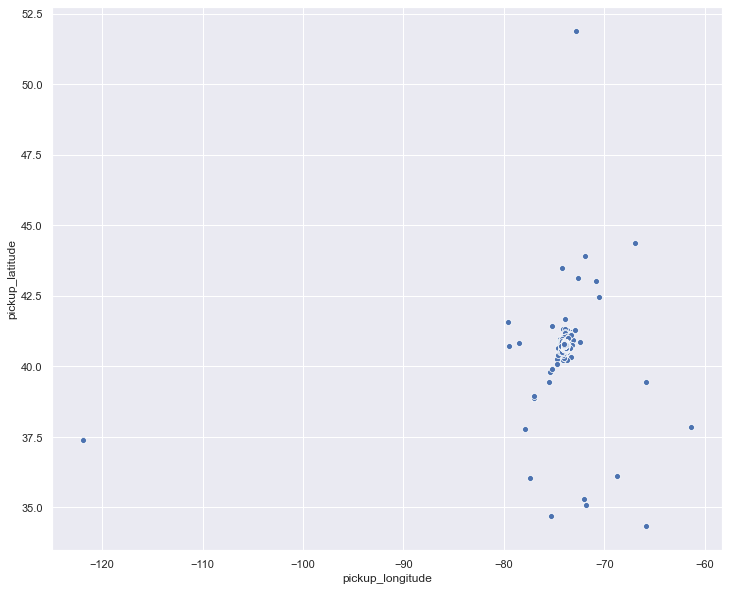

In [198]:
plt.figure(figsize= (12, 10))
sns.scatterplot(data = df, x = 'pickup_longitude' , y = 'pickup_latitude')

მოცემული გრაფიკიდან თითქმის შეუძლებელია საერთოდ რამის განსაზღვრა, გარდა ერთისა: ისევე როგორც მგზავრობის ხანგრძლივობაში, გეოგრაფიულ ლოკაციებშიც გვაქვს განცალკევებული მონაცემები. ზემოთ მოყვანილ გრაფიკს თუ დავუჯერებთ ზოგიერთი მგზავრი ტაქსიმ ნიუ იორკიდან რამდენიმე ასეული კილომეტრის დაშორებით აიყვანა, რაც სავარაუდოდ შეცდომაა მონაცემებში.

ახლა კი მოდით გრაფკიკის მეტად წაკითხვად ფორმატში მოყვანას შევუდგეთ:
* პირველ რიგში გრაფკიკის x და y ღერძები შევზღუდოთ
* ასევე სასურველია წერტილებს მეტი გამჭვირვალობა შევძინოთ
* და ზომაში შევამციროთ

(40.6, 40.9)

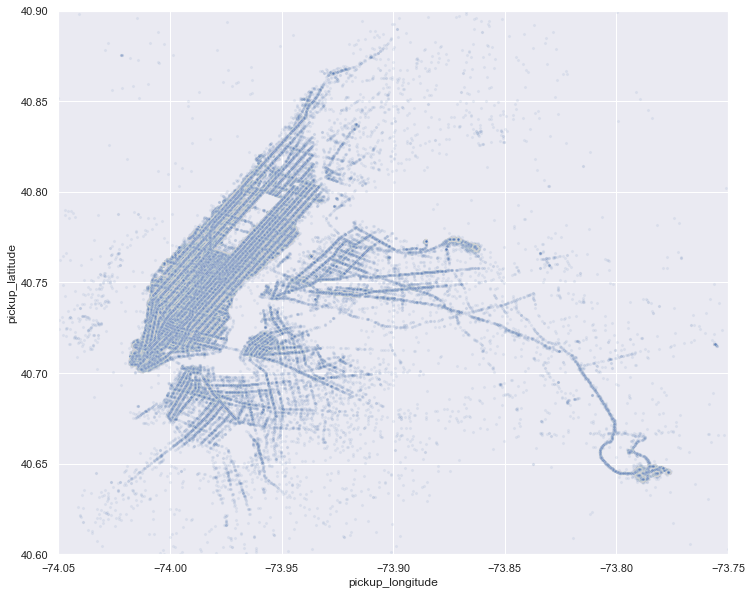

In [199]:
plt.figure(figsize= (12, 10))
sns.scatterplot(data = df, x = 'pickup_longitude' , y = 'pickup_latitude', alpha = 0.1, s = 10)
plt.xlim((-74.05, -73.75)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად
plt.ylim((40.6, 40.9)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად

როგორც ხედავთ მხოლოდ ტაქსიში ჩასხდომის წერტილების დასმით ნიუ იორკის რუქა გამოისახა. ცხადად ჩანს, რომ ძირითადი მგზავრობები მანჰეტენზე ხდება, რაც ლოგიკურია. ტაქსით მომსხაურება საკმაოდ ძვირია მანჰეტენი კიდე ქალაქის ყველაზე მდიდარი და საქმიანი უბანია. ქვედა მარჯვენა კუთხეში დატვირთული ნაწილი კი აეროპორტია. ახლა კი იგივეს დავაკვირდეთ კომპანიების ჭრილში თუ დავინახავთ რაიმე განსხვავებას.

(40.6, 40.9)

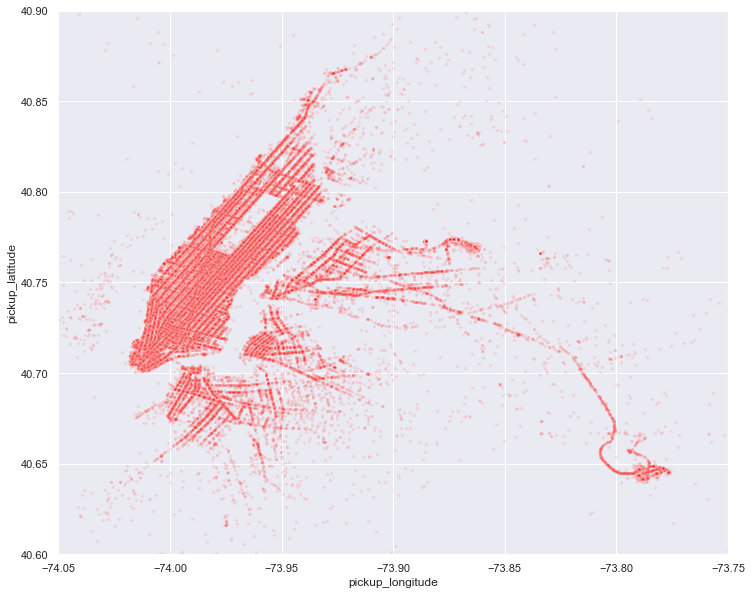

In [200]:
plt.figure(figsize= (12, 10))
sns.scatterplot(data = df[df['vendor_id'] == 1], x = 'pickup_longitude' , \
                y = 'pickup_latitude', alpha = 0.1, s = 10, color='red')
plt.xlim((-74.05, -73.75)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად
plt.ylim((40.6, 40.9)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად

(40.6, 40.9)

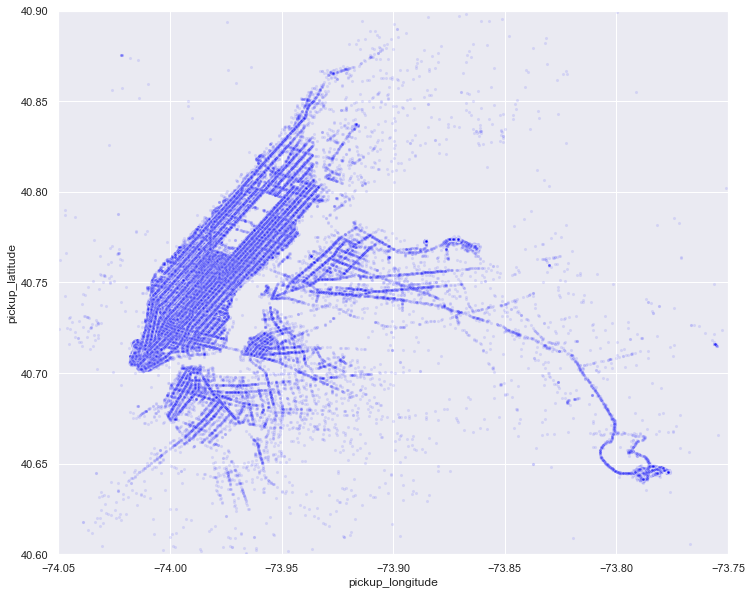

In [201]:
plt.figure(figsize= (12, 10))
sns.scatterplot(data = df[df['vendor_id'] == 2], x = 'pickup_longitude' , \
                y = 'pickup_latitude', alpha = 0.1, s = 10, color='blue')
plt.xlim((-74.05, -73.75)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად
plt.ylim((40.6, 40.9)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად

მოცემული გრაფიკებიდან ჩანს რომ ორივე კომპანია თანაბრად ფარავს მთლიან ქალაქს. თუმცა რამდენიმე აბზაცის წინ ჩვენ ვივარაუდეთ რომ მეორე კომპანია უფრო შორ მონაკვეთებზე მუშაობდა. ისღა დაგვრჩენია ჩასხდომის და დასრულების ლოკაციების შედარებით მეტი მგზავრის ჭრილში შევხედოთ. როგორც ვნახეთ პირველი კომპანია თითქმის არ ემსახურებოდა 5 ან მეტ მგზავრს, შესაბამისად ჩვენც ზუსტად ასეთი პირობით შევამოწმოთ წერტილების სიხშირე.

(40.6, 40.9)

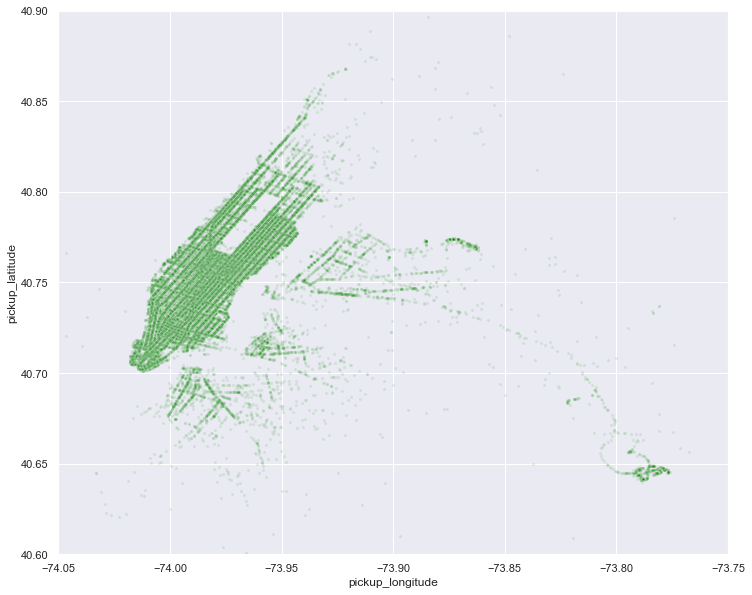

In [216]:
plt.figure(figsize= (12, 10))
sns.scatterplot(data = df[df['passenger_count'] >= 5], x = 'pickup_longitude' , \
                y = 'pickup_latitude', alpha = 0.1, s = 10, color='green')
plt.xlim((-74.05, -73.75)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად
plt.ylim((40.6, 40.9)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად

(40.6, 40.9)

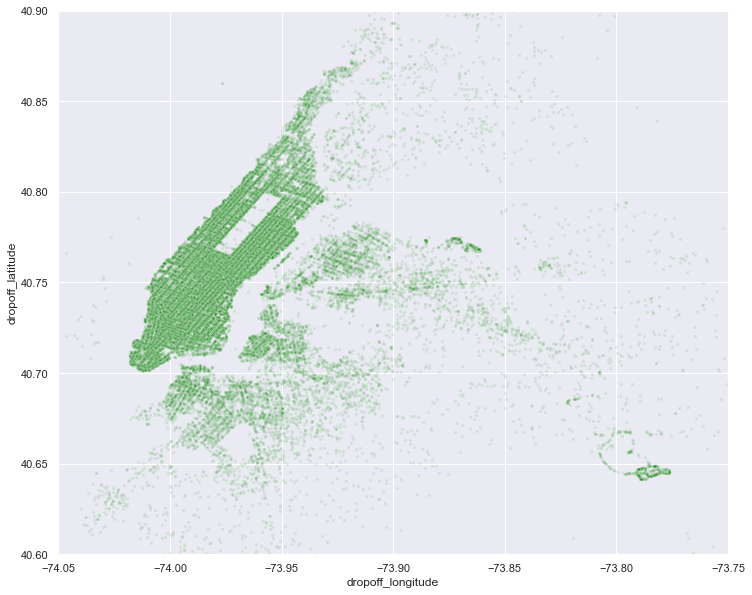

In [217]:
plt.figure(figsize= (12, 10))
sns.scatterplot(data = df[df['passenger_count'] >= 5], x = 'dropoff_longitude' , \
                y = 'dropoff_latitude', alpha = 0.1, s = 10, color='green')
plt.xlim((-74.05, -73.75)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად
plt.ylim((40.6, 40.9)) #მნიშვნელობები მიღებულია მრავალი იტერაციის შედეგად

აქ უკვე ნათლად გამოჩნდა, რომ მგზავრობის დასრულების ლოკაციებში, მეტადაა დატვირთული მეორე კომპანია. ზოგადად ასეთი მონაცემი ბევრი არ არის ჩვენს ცხრილში. თუმცა შეგვიძლია დავასკვნათ, რომ მგზავრების რაოდენობის და კომპანიის კომბინაცია მნიშვნელოვანი ფაქტორი შეიძლება იყოს მოდელირებისას. შესაბამისად მონაცემების სიდიდის მიუხედავად ისინი აუცილებლად უნდა დავტოვოთ მოდელირების პროცესში.

რა თქმა უნდა აღნიშნულ ცვლადებზე კიდევ უფრო დეტალური ანალიზის გაკეთებაც შეიძლება, მაგალითად მოვიძიეთ გარე წყარო, რომელიც გრძედებისა და განედების მიხედვით ცერტილებს მიანიჭებს ქალაქის უბნებს და უკვე უბნების ჭრილში გავანალიზოთ მონაცემები. ჩვენ რჩევაც ზუსტად ეს იქნება, მოიძიოთ დამატებითი ინფორმაცია რაც შეიძლება სასარგებლო იყოს იქნება ეს უბნები, ჰაერის ტემპერატურა თუ სხვა რამე.

#### 3.3.4 მგზავრობის დროები

##### Line Chart
გრაფიკის ტიპი რომელიც სერიული ტიპის მონაცემებს წარმოაჩენს როგორც უწყვეტი ხაზით დაკავშირებულ მრავალ წერტილს. აღნიშნული ვიზუზალიზაცია ძირითადად გამოიყენება დროზე დამოკიდებული ცვლდებისთის. შესაბამისად ჩვენი დარჩენი ორი ცვლადის (მგზავრრობის დაწყების და დასრულების დროები) გასაანილეზებლად სწორედაც Line chart დაგვჭირდება. 

დროის ცვლადების კარგად გასაანალიზებლად პირველ რიგში მათი ჩაშვლა დაგვჭირდება, თვეებად, კვირის დღეებად და საათებად.

In [240]:
# ეს შეიძლება ითქვას რომ მახასიათებლების შექმნის ნაწილია, თუმცა ამაზე შემდგომ თავში უფრო დეტალურად ვისაუბრებთ

df['pickup_month'] = df['pickup_datetime'].dt.month #datetime ფორმატიდან თვის ამოღება
df['dropoff_month'] = df['dropoff_datetime'].dt.month #datetime ფორმატიდან თვის ამოღება

df['pickup_weekday'] = df['pickup_datetime'].dt.dayofweek #datetime ფორმატიდან კვირის დღის ამოღება
df['dropoff_weekday'] = df['dropoff_datetime'].dt.dayofweek #datetime ფორმატიდან კვირის დღის ამოღება

df['pickup_hour'] = df['pickup_datetime'].dt.hour #datetime ფორმატიდან საათის ამოღება
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour #datetime ფორმატიდან საათის ამოღება

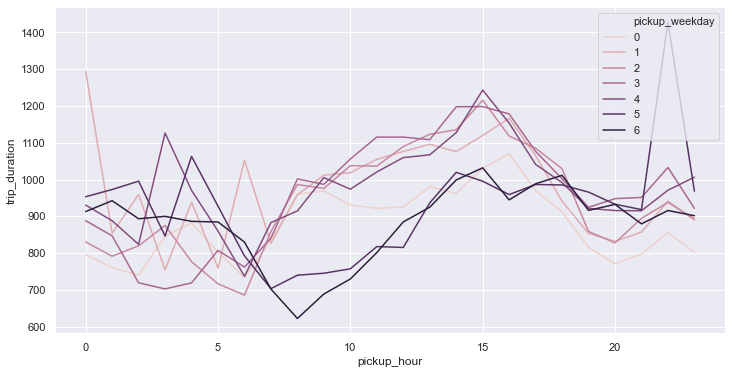

In [241]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="pickup_hour", y="trip_duration", ci=None, hue='pickup_weekday', legend='full')

გრაფიკზე ვხედავთ მგზავრობის საშუალო ხანგრძლიოვბას კვირის დღეებისა და საათების მიხედვით. მკაფიოდ ჩანს რომ უქმეებზე (5-შაბათი, 6-კვირა) საშუალოდ უფრო სწრაფად გაადგილდება ტაქსი. ყველაზე მაღალი მაჩვენებელი კი სამუშაო დღეებში 10 საათიდან 17 საათამდეა. ასევე ჩანს თუ როგორი გადატვირთულია ქალაქი შაბათს საღამოს საათებში, თუმცა საეჭვოდ გაზრდილია. კიდევ ერთი მკვეთრი უცნაურობა კი სამშაბათს შუაღამეა, რაც დამატებით ჩაძიებას საჭიროებს.

In [249]:
round(df[(df['pickup_hour'] == 0) & (df['pickup_weekday'] == 1)]['trip_duration'].describe(), 3)

count       4506.000
mean        1294.658
std        29060.878
min            3.000
25%          351.000
50%          591.500
75%         1002.750
max      1939736.000
Name: trip_duration, dtype: float64

In [257]:
round(df[(df['pickup_hour'] == 22) & (df['pickup_weekday'] == 5)]['trip_duration'].describe(), 3)

count      12371.000
mean        1428.601
std        36850.340
min            2.000
25%          427.000
50%          690.000
75%         1065.000
max      3526282.000
Name: trip_duration, dtype: float64

როგორც მოსალოდნელი იყო, საშუალოს "გაფუჭება" ჩვენი განცალკევებული მონაცემების ბრალი აღმოჩნდა. მოდით ახლიდან დავაკვირდეთ იგივე გრაფიკს, მხოლოდ ისევ 2 საათზე მოვჭრათ მონაცემები როგორც თავის დასაწყისში.

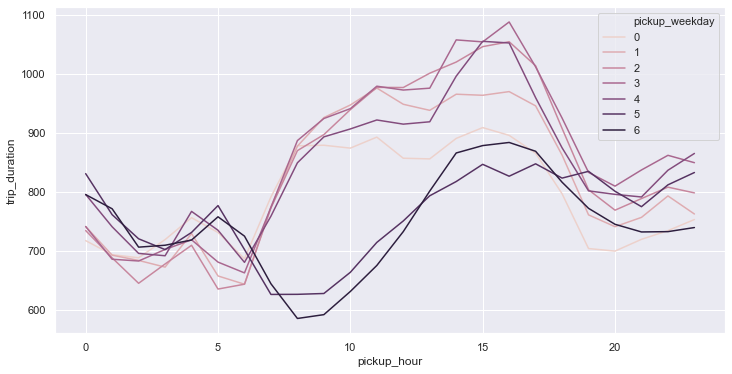

In [258]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['trip_duration'] < 7200], x="pickup_hour", y="trip_duration", \
             ci=None, hue='pickup_weekday', legend='full')

მგზავრობის ხანგრძლივობის ხანგრძლიოვბის 2 საათზე მოჭრამ, არა მხოლოდ მკვეთრად გამოხატული უცნაურობები გააქრო, არამედ ზოგადად მთელი გრაფიკი უფრო დააგლუვა. 

ზოგადად მსგავსი ტიპის ოპერაციას განცალკევებული მონაცემების გადაყრას ვუწოდებთ ხოლმე. ის ერთ-ერთი უმნიშნველოვანესი ნაწილია, როდესაც გვსურს როგორც მონაცემების სწორად გაანალიზება ისე მოდელირება. თუმცა ამ პროცესის გარდა კიდევ ბევრი ნაბიჯია გასავლელი იქამდე სანამ მოდელის პირველ დამუშავებულ ვერსიას გავუშვებთ. ამ პროცესების ერთობლიობას მონაცემების მომზადება ეწოდება და იდეურად ის მონაცემების კვლევითი ანალიზის განუყოველი ნაწილია. თუმცა ჩვენ გვურს ეს შემდგომ თავში გავიაროთ, რათა უფრო მეტ დეტალებზე კონცენტრირება შევძლოთ და სიახლეებიც ნაბიჯ-ნაბიჯ ავითვისოთ.